1. Import Libraries & Basic Operations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('/content/House Price Prediction Dataset.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


2. Basic Info



In [5]:
print(df.shape)



(2000, 10)


In [6]:
print(df.columns)



Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [7]:
print(df.isnull().sum())


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [8]:
print(df.describe(include='all'))

                 Id         Area     Bedrooms   Bathrooms       Floors  \
count   2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
unique          NaN          NaN          NaN         NaN          NaN   
top             NaN          NaN          NaN         NaN          NaN   
freq            NaN          NaN          NaN         NaN          NaN   
mean    1000.500000  2786.209500     3.003500     2.55250     1.993500   
std      577.494589  1295.146799     1.424606     1.10899     0.809188   
min        1.000000   501.000000     1.000000     1.00000     1.000000   
25%      500.750000  1653.000000     2.000000     2.00000     1.000000   
50%     1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%     1500.250000  3887.500000     4.000000     4.00000     3.000000   
max     2000.000000  4999.000000     5.000000     4.00000     3.000000   

          YearBuilt  Location Condition Garage          Price  
count   2000.000000      2000      2000   2000 

3. EDA

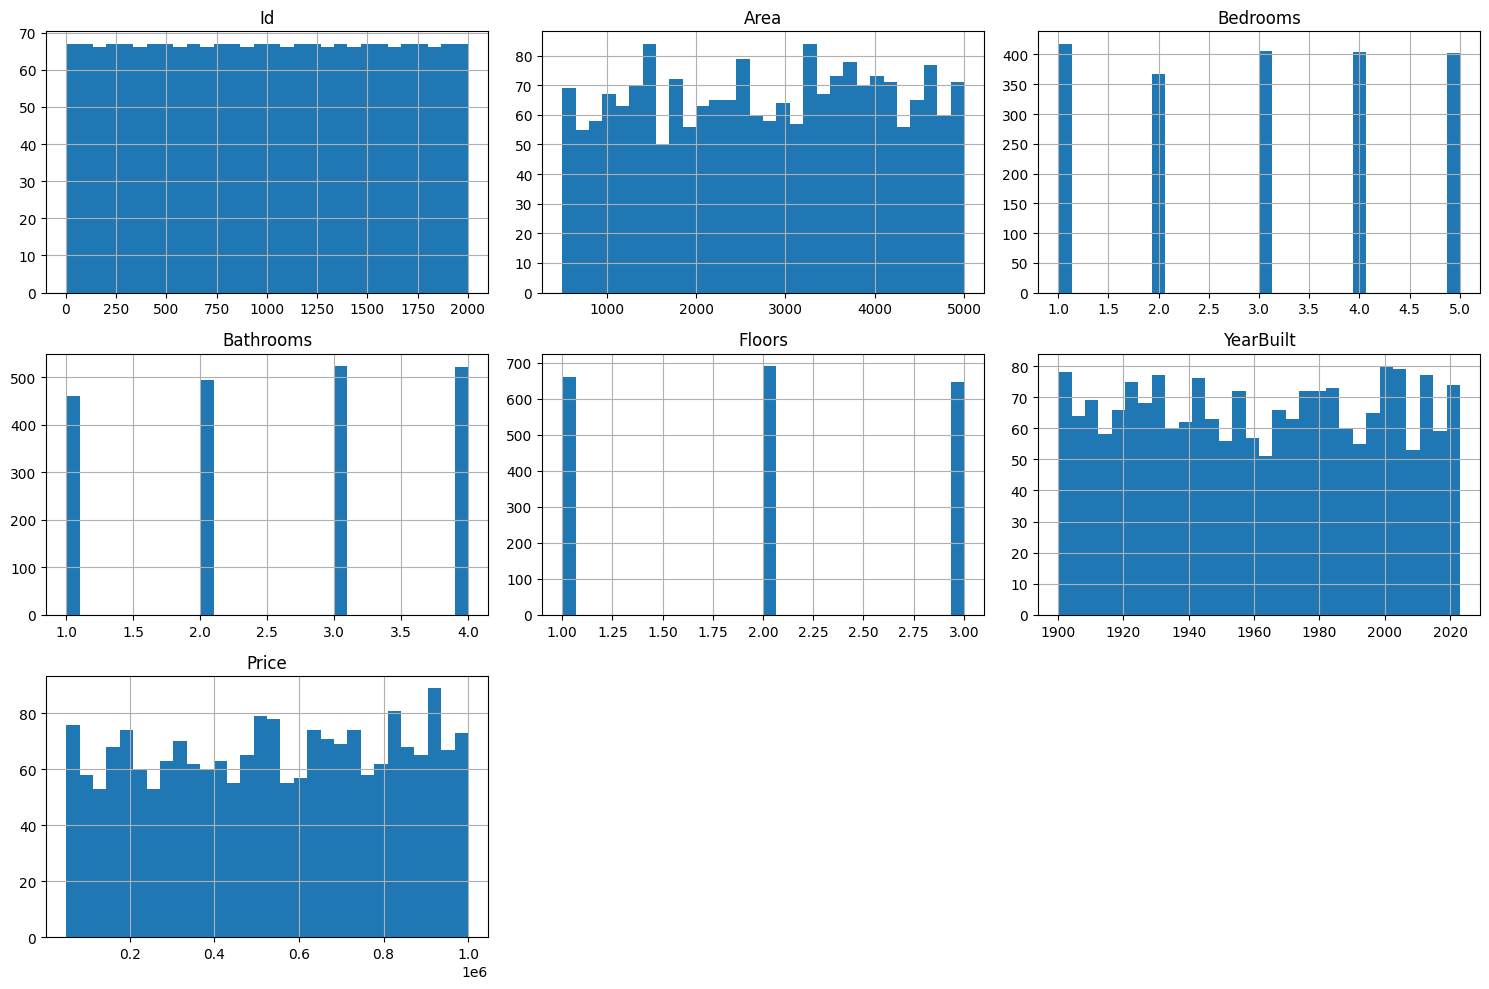

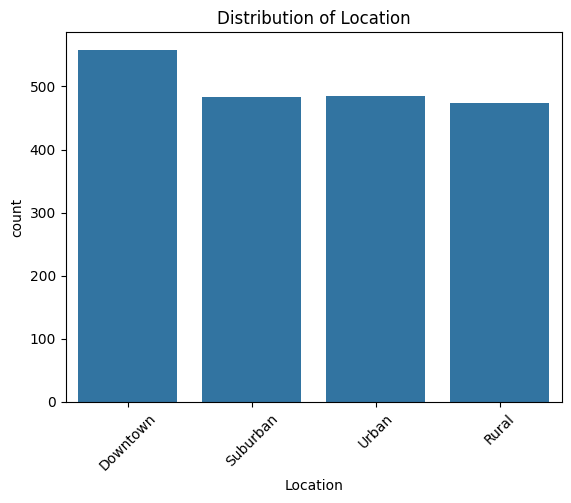

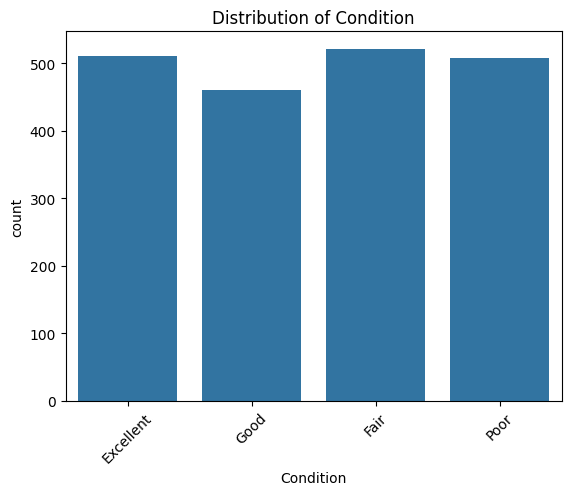

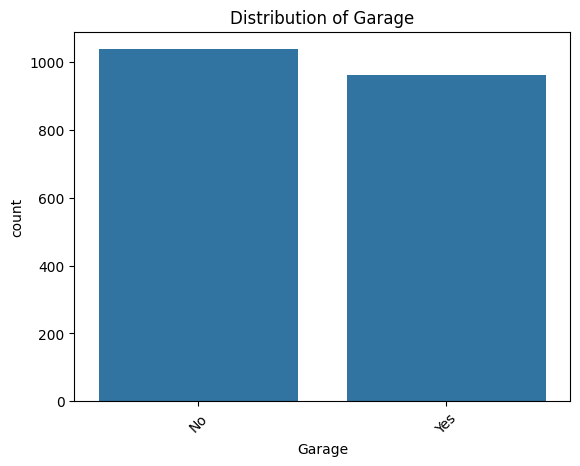

In [9]:
#Univariate Analysis
# Numeric
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Categorical
for col in ['Location', 'Condition', 'Garage']:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

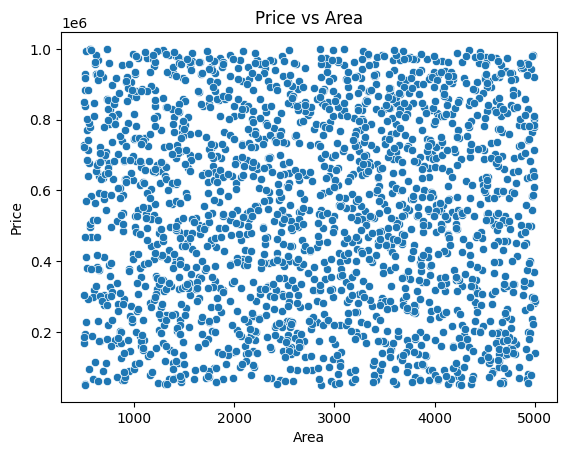

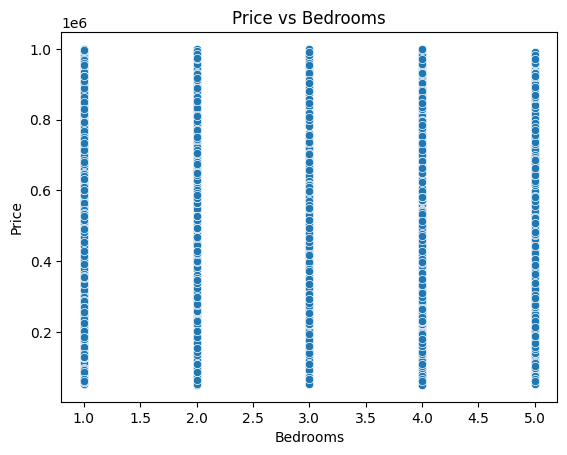

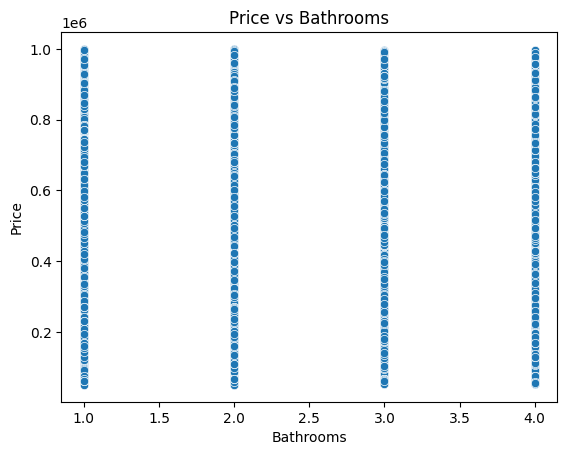

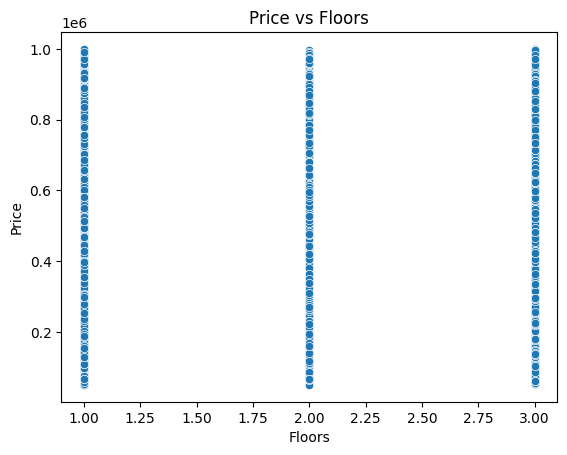

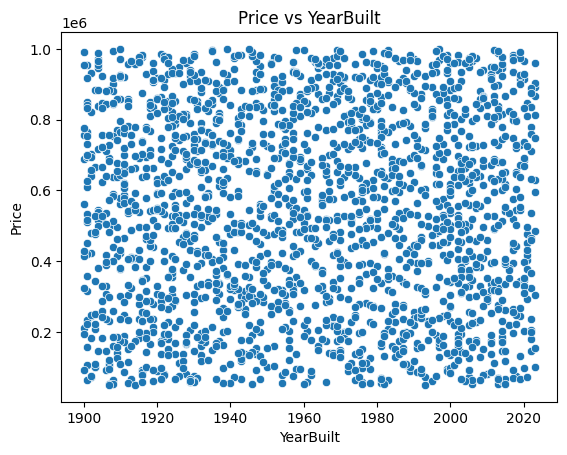

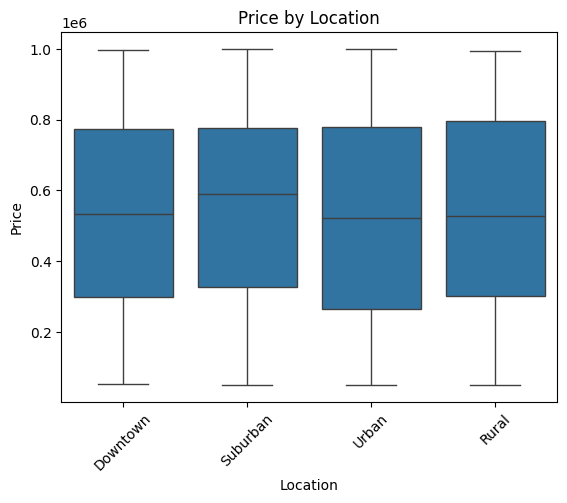

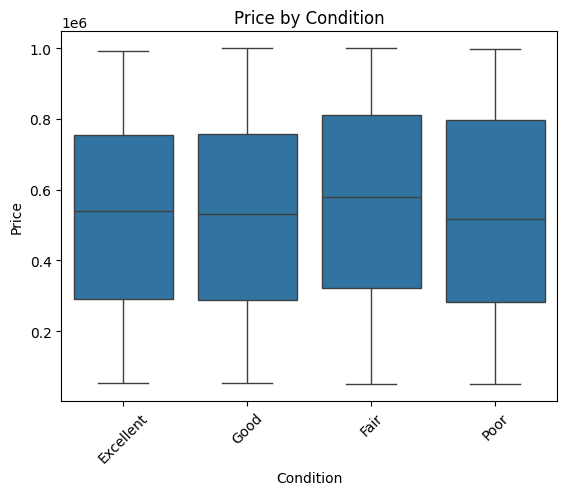

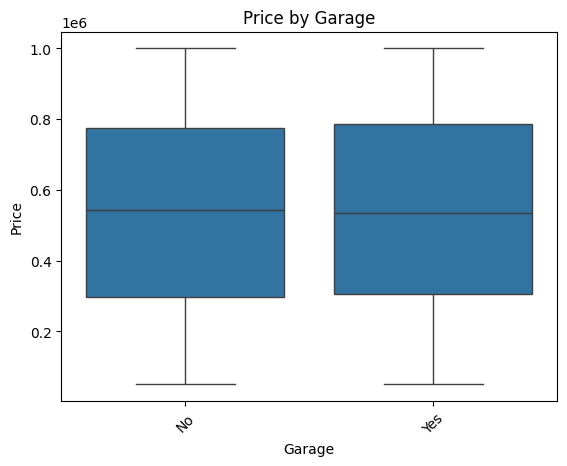

In [10]:
#Bivariate Analysis
# Price vs Numeric Features
num_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
for col in num_features:
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')
    plt.show()

# Price vs Categorical
for col in ['Location', 'Condition', 'Garage']:
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
    plt.show()


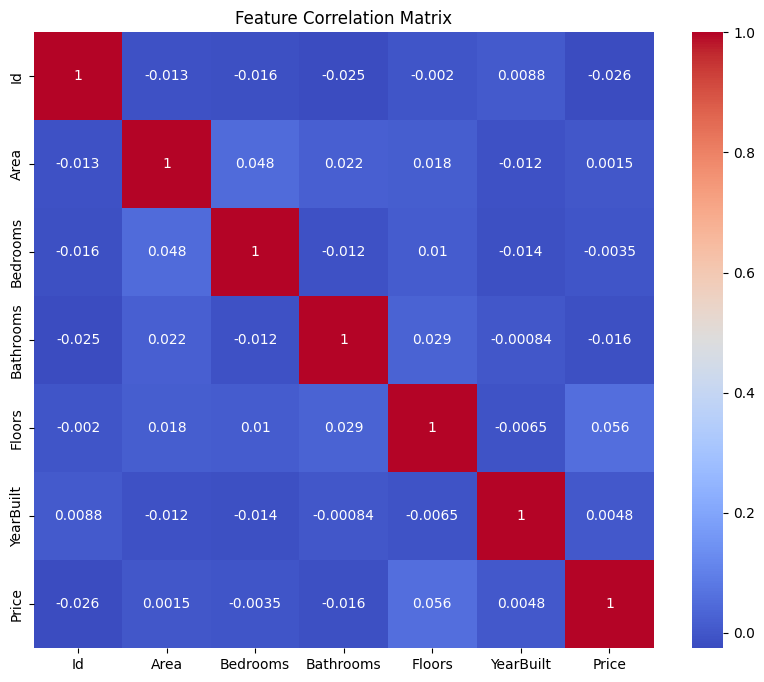

In [12]:
#  Multivariate (Correlation)
# Correlation heatmap
plt.figure(figsize=(10,8))
# Include only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

8. Model Training

In [16]:
# Define the target variable
target = 'Price'  # Assuming 'Price' is the column you want to predict

if target in df.columns:
    X = df.drop(columns=[target])
    y = df[target]

    # Convert categorical features to numerical using one-hot encoding
    X = pd.get_dummies(X, columns=['Location', 'Condition', 'Garage'], drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

  9. Accuracy Metrics

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Accuracy:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


Model Accuracy:
MAE: 242867.44926338628
MSE: 78279764120.86243
R² Score: -0.006181784611834162


10. Visualize Prediction vs Actual

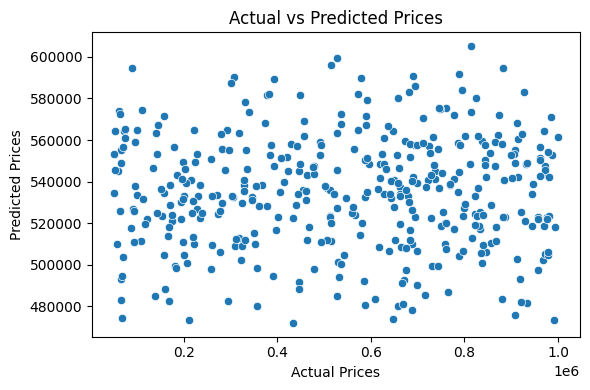

In [25]:
   plt.figure(figsize=(6, 4))
   sns.scatterplot(x=y_test, y=y_pred)
   plt.xlabel("Actual Prices")
   plt.ylabel("Predicted Prices")
   plt.title("Actual vs Predicted Prices")
   plt.tight_layout()
   plt.show()
